In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from datetime import datetime
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#For Prediction
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm
from sklearn.svm import SVR
from sklearn import metrics

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read Datasets 
research_data_raw = pd.read_csv('Datasets/bitcoin_research_data_v2.csv')

# Drop unnecessary columns
research_data = research_data_raw.drop('Unnamed: 0', axis=1)
research_data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Popularity,Popularity_Normalized
0,2019-05-11,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75,12.0,1200.0
1,2019-05-10,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28,12.0,1200.0
2,2019-05-09,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39,12.0,1200.0
3,2019-05-08,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52,12.0,1200.0
4,2019-05-07,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65,12.0,1200.0


In [3]:
# Define constants
TIME_STEPS = 10

In [4]:
# Define plot function
def line_plot(line1, line2, line3, label1=None, label2=None, label3=None, title=''):
    fig, ax = plt.subplots(1, figsize=(16, 9))
    ax.plot(line1, label=label1, linewidth=2)
    ax.plot(line2, label=label2, linewidth=2)
    ax.plot(line3, label=label3, linewidth=2)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18)

In [5]:
# Sort dataframe by date ascending
research_data.sort_values(by='Date', inplace=True, ascending=True) # Sort by date ascending

In [6]:
# Create Prediction column with values based on last TIME_STEP days
research_data['Prediction'] = research_data['Close'].shift(-TIME_STEPS)
research_data.tail(20)

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Popularity,Popularity_Normalized,Prediction
19,2019-04-22,BTCUSD,5297.0,5453.3,5245.0,5384.0,5931.82,31723880.44,9.0,900.0,5390.0
18,2019-04-23,BTCUSD,5384.0,5645.0,5363.3,5525.4,8384.74,46464963.08,9.0,900.0,5660.0
17,2019-04-24,BTCUSD,5525.4,5627.9,5375.3,5442.2,7884.92,43153149.57,9.0,900.0,5763.5
16,2019-04-25,BTCUSD,5442.2,5510.5,4357.1,5128.7,11255.14,59191341.54,9.0,900.0,5716.9
15,2019-04-26,BTCUSD,5128.7,5290.0,5043.3,5153.0,8979.17,46233903.21,9.0,900.0,5687.4
14,2019-04-27,BTCUSD,5153.0,5216.5,5116.7,5168.5,2868.55,14821166.99,9.0,900.0,5906.7
13,2019-04-28,BTCUSD,5168.5,5215.4,5100.2,5156.1,2657.27,13721685.21,9.0,900.0,5939.6
12,2019-04-29,BTCUSD,5156.1,5194.2,5061.1,5149.0,4372.55,22506670.72,9.0,900.0,6151.4
11,2019-04-30,BTCUSD,5149.0,5297.0,5131.1,5272.2,4857.74,25384536.33,9.0,900.0,6337.9
10,2019-05-01,BTCUSD,5272.2,5359.3,5270.0,5323.3,3469.49,18421340.25,9.0,900.0,6793.5


In [7]:
# Prepare for Training

In [8]:
# Create X set
# Drop unnecessary columns for X - only 'Open', 'High', 'Low' and 'Popularity' columns are used
X = np.array(research_data.drop(['Prediction','Date','Symbol','Popularity_Normalized','Volume BTC','Volume USD'], 1))
X = preprocessing.scale(X)
X = X[:-TIME_STEPS]
X_forecast = X[-TIME_STEPS:]

In [9]:
# Create y set
y = np.array(research_data['Prediction'])
y = y[:-TIME_STEPS]
y_forecast = y[-TIME_STEPS:]

In [10]:
# Split data into test and training sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [11]:
# Create and fit SVR model with Linear Kernel
svr_linear = SVR(kernel='linear', C=1e3)
svr_linear.fit(X_train, y_train)

# Run model against test set
prediction_linear = svr_linear.predict(X_test)

# Evaluate the prediction accuracy of the model
print("The Explained Variance: %.2f" % svr_linear.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f" % metrics.mean_absolute_error(y_test, prediction_linear))  
print("The Median Absolute Error: %.2f" % metrics.median_absolute_error(y_test, prediction_linear)) 
print("The Mean Squared Error: %.2f" % metrics.mean_squared_error(y_test, prediction_linear)) 
print("The Root Mean Squared Error: %.2f" % (np.sqrt(metrics.mean_squared_error(y_test, prediction_linear))))

The Explained Variance: 0.96
The Mean Absolute Error: 313.44
The Median Absolute Error: 64.12
The Mean Squared Error: 408526.02
The Root Mean Squared Error: 639.16


In [12]:
# Create and fit SVR model with default Radial Basic Kernel
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)

# Run model against test set
prediction_rbf = svr_rbf.predict(X_test)

# Evaluate the prediction accuracy of the model
print("The Explained Variance: %.2f" % svr_rbf.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f" % metrics.mean_absolute_error(y_test, prediction_rbf))  
print("The Median Absolute Error: %.2f" % metrics.median_absolute_error(y_test, prediction_rbf)) 
print("The Mean Squared Error: %.2f" % metrics.mean_squared_error(y_test, prediction_rbf)) 
print("The Root Mean Squared Error: %.2f" % (np.sqrt(metrics.mean_squared_error(y_test, prediction_rbf))))

The Explained Variance: 0.97
The Mean Absolute Error: 268.82
The Median Absolute Error: 50.40
The Mean Squared Error: 265544.88
The Root Mean Squared Error: 515.31


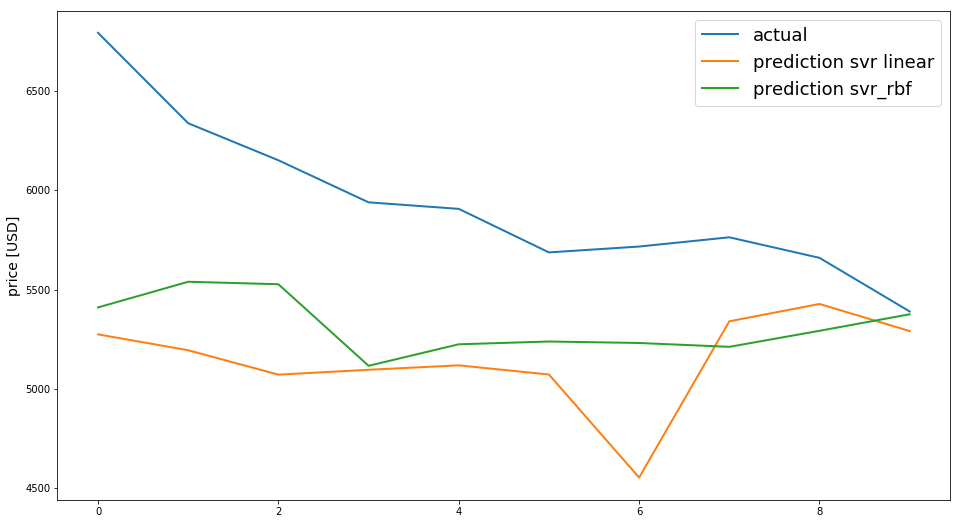

In [14]:
# Run SVR model with Linear kernel against forecast set
prediction_forecast_svr_linear = svr_linear.predict(X_forecast)
prediction_forecast_svr_linear_series = pd.Series(index=research_data[-TIME_STEPS:].index, data=prediction_forecast_svr_linear)

# Run SVR model with Radial Basic kernel against forecast set
prediction_forecast_rbf_linear = svr_rbf.predict(X_forecast)
prediction_forecast_rbf_linear_series = pd.Series(index=research_data[-TIME_STEPS:].index, data=prediction_forecast_rbf_linear)

# Transform y forecast into a pandas series
results_forecast_svr_linear_series = pd.Series(index=research_data[-TIME_STEPS:].index, data=y_forecast)

# Plot results
line_plot(results_forecast_svr_linear_series, prediction_forecast_svr_linear_series, prediction_forecast_rbf_linear, 'actual', 'prediction svr linear', 'prediction svr_rbf')